**Titanic Data set**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn as sk 
import math
%matplotlib inline

#how many people survived in Titanic Sinking is what this model is all about..


In [51]:
#reading the csv by using pandas.

titanic_dataset = pd.read_csv(r"C:\Users\Samson Noronha\Desktop\Samson\Titanic data..csv")
titanic_dataset.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


In [68]:
survived_sum = titanic_dataset['Survived'].count()
survived_sum

418

In [63]:
#showing the different count of female and male where survived in titanic.. 
SS= titanic_dataset.groupby('Survived')['Sex'].value_counts()
SS

Survived  Sex   
0         male      266
1         female    152
Name: count, dtype: int64

In [66]:
#titanic_dataset = pd.concat([titanic_dataset, SS], axis = 1)
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,count
0,892.0,0.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,NaN
1,893.0,1.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S,NaN,NaN
2,894.0,0.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q,NaN,NaN
3,895.0,0.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S,NaN,NaN
4,896.0,1.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S,NaN,NaN


In [4]:
#just to check the how much people where there in Titanc..

print("no of passengers who wthere there in titanic:" +str(len(titanic_dataset.index)))

no of passengers who wthere there in titanic:418


<Axes: xlabel='Survived', ylabel='count'>

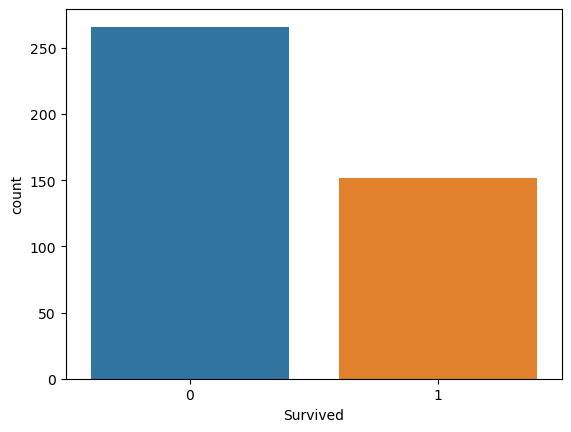

In [5]:
#now we will analysize the data from sex..

sns.countplot(x="Survived", data=titanic_dataset)

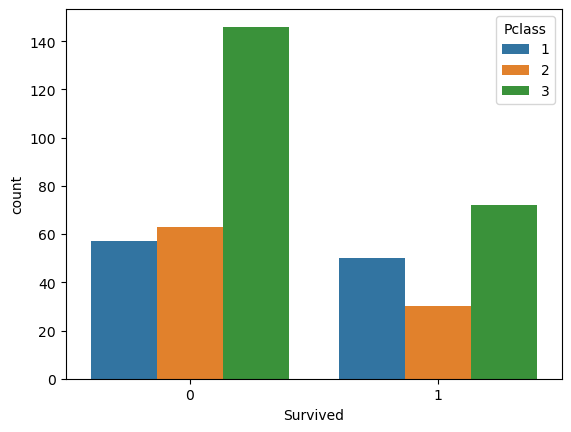

In [8]:
titanic_dataset['Pclass'] = titanic_dataset['Pclass'].astype(str)
titanic_dataset['Pclass'] = pd.Categorical(titanic_dataset['Pclass'])
sns.countplot(x="Survived", hue="Pclass", data=titanic_dataset)
plt.show()

In [16]:
print(sns.__version__)

0.12.2


In [9]:
print(titanic_dataset.isnull().sum())  # Check for missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Axes: ylabel='Frequency'>

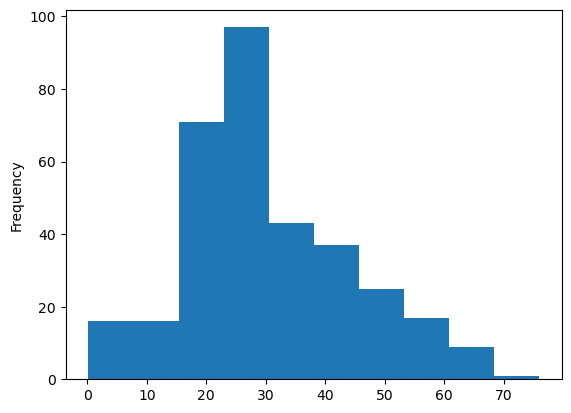

In [10]:
#now we will check check age group.

titanic_dataset["Age"].plot.hist()

<Axes: ylabel='Frequency'>

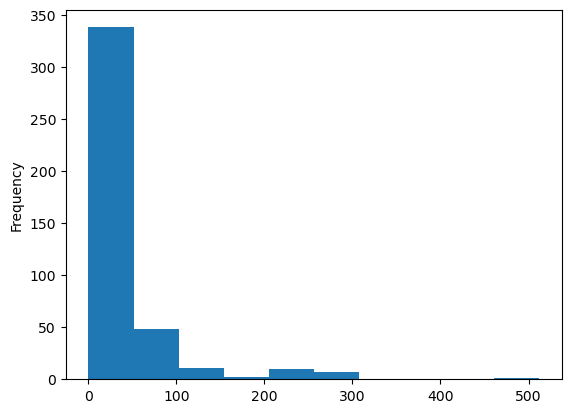

In [11]:
#now we will check check fare price.

titanic_dataset["Fare"].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

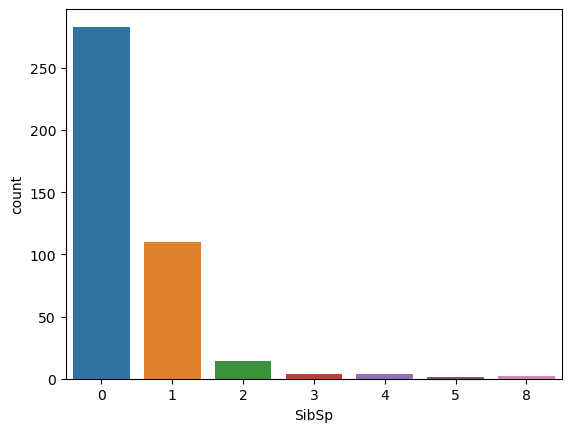

In [12]:
#checking how much Sibblings and spouse where there in the titanic..
sns.countplot(x="SibSp", data=titanic_dataset)

 Will be cleaning the data now..

In [13]:
#we'll start with removing all the null values..
#so we'll check for the for all the null values..


titanic_dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [16]:
#To  check all the null values now. 

titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

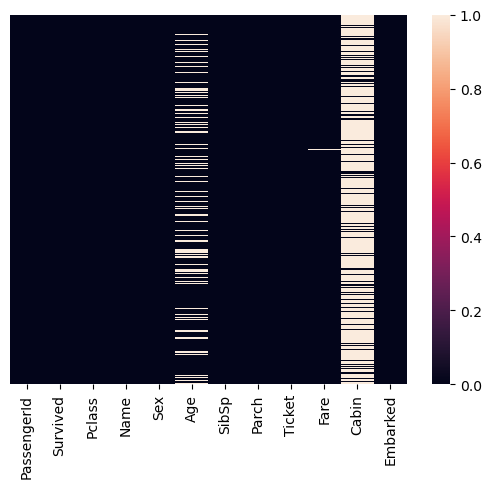

In [23]:
#creating the heatmap for all the amount of data..

sns.heatmap(titanic_dataset.isnull(), yticklabels = False)

C:\Users\Samson Noronha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Pclass', ylabel='Age'>

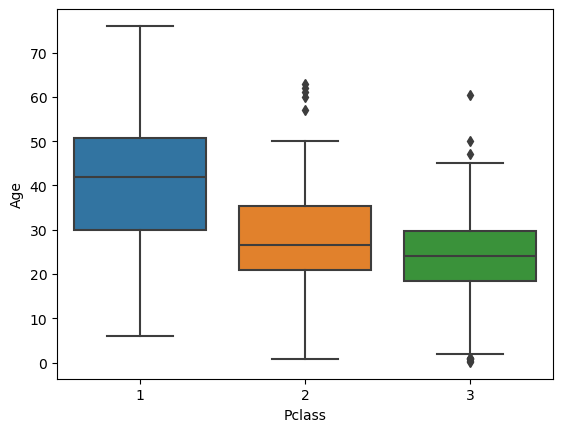

In [25]:
#checking with boxplot as well.. we see passenger who were travelling in class 1  and 2 were much older than what we can see in class 3..

sns.boxplot(x='Pclass', y='Age', data= titanic_dataset)

In [32]:
#for cleaning will be droping the cabin column as it has more number of Null values which is not required..

titanic_dataset.drop("Cabin", axis = 1, inplace=True)
titanic_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [33]:
#Now we will remove all the remaining Null values.. by using Dropna method.

titanic_dataset.dropna(inplace=True)
titanic_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<Axes: >

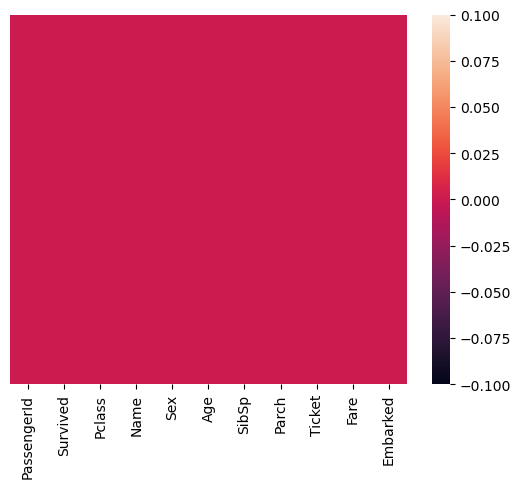

In [34]:
#let us  check again if we have any null values showing up on the heatmap..

sns.heatmap(titanic_dataset.isnull(), yticklabels = False)

In [35]:
#as a result on the above heatmap we can conclude that we don't have any null values in the data..

#we will confirm that using sum method..

titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [56]:
#now we arrange our data into categorical variables data..

Sex = pd.get_dummies(titanic_dataset['Sex'], drop_first= True)
Sex = Sex.astype(int)
Sex.head(5)

,male
0,1
1,0
2,1
3,1
4,0


In [62]:
embark = pd.get_dummies(titanic_dataset['Embarked'], drop_first= True)
embark = embark.astype(int)
embark.head(5)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [64]:
PCL = pd.get_dummies(titanic_dataset['Pclass'], drop_first= True)
PCL = Pclass.astype(int)
PCL.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [70]:
#Now we will join all the columns which we have made to the mains one..
titanic_dataset = pd.concat([titanic_dataset, Sex, embark, PCL], axis = 1)

In [71]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [78]:
#we will drop all the unwanted columns from our data set..
titanic_dataset.drop(['PassengerId','Pclass', 'Name', 'Sex',  'Ticket', 'Embarked'], axis = 1, inplace = True)

In [85]:
titanic_dataset.head()

,Survived,SibSp,Parch,Fare,male,Q,S,2,3
0,0,0,0,7.8292,1,1,0,0,1
1,1,1,0,7.0000,0,0,1,0,1
2,0,0,0,9.6875,1,1,0,1,0
3,0,0,0,8.6625,1,0,1,0,1
4,1,1,1,12.2875,0,0,1,0,1


### Train Data

In [87]:
x = titanic_dataset.drop("Survived", axis = 1)
y = titanic_dataset["Survived"]

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [96]:
from sklearn.linear_model import LogisticRegression

In [99]:
Log_model = LogisticRegression()

In [101]:
Log_model.fit(X_train, y_train)

LogisticRegression()

In [105]:
predictions = Log_model.predict(X_test)

In [106]:
from sklearn.metrics import classification_report

In [107]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        57\n           1       1.00      1.00      1.00        43\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(y_test, predictions)

array([[57,  0],
       [ 0, 43]], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
accuracy_score(y_test, predictions)

1.0